In [79]:
def toggle_warning():
    HTML('''<script>
    code_show_err=false; 
    function code_toggle_err() {
     if (code_show_err){
     $('div.output_stderr').hide();
     } else {
     $('div.output_stderr').show();
     }
     code_show_err = !code_show_err
    } 
    $( document ).ready(code_toggle_err);
    </script>
    To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [80]:
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

%matplotlib inline

In [81]:
from tensorflow.examples.tutorials.mnist import input_data

In [82]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
mnist.train.images.shape

(55000, 784)

In [10]:
mnist.test.images.shape

(10000, 784)

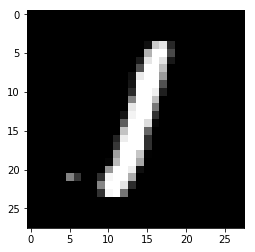

In [112]:
#show image from dataset

#the image data has been flatened so it needs to be reshaped
image_single = mnist.train.images[17].reshape(28,28)
plt.imshow(image_single,cmap='gist_gray')

#the image data has already been normalized for us

In [83]:
#placeholders
x = tf.placeholder(tf.float32,shape=[None,784])

In [84]:
#variables
W = tf.Variable(tf.zeros([784,10]))
B = tf.Variable(tf.zeros([10]))
toggle_warning()

In [85]:
#graph operations
y = tf.nn.softmax(tf.matmul(x,W) + B)

In [86]:
#loss fnc
y_true = tf.placeholder(tf.float32,[None,10])
cross_ent = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
toggle_warning()

In [88]:
#optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(cross_ent)

In [89]:
#session
init = tf.global_variables_initializer()

In [149]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        #it returns a tuple with
        #x = 784 pixels for img and y for label
        batch_x , batch_y = mnist.train.next_batch(100)
        
        #training requires train data and train labels
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    #returns the label of the highest probability and compares it with actual value and returns true or false if the prediction is correct
    pred = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))

    #returns average 
    #meaning how many times was the model right and wrong
    #mean here means accuracy
    accuracy = tf.reduce_mean(tf.cast(pred,tf.float32))

    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9002


90% accuracy is good but not the best. Lets make a prediction using real data